<a href="https://colab.research.google.com/github/GitHoobar/pracs/blob/main/nn_classification__pth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import sklearn
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)


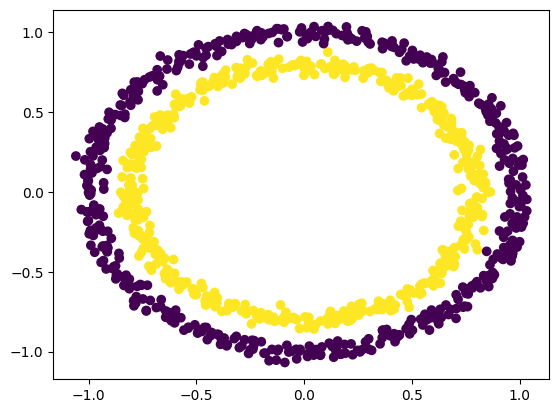

In [4]:
plt.scatter(X[: , 0],
            X[: , 1],
            c = y)
plt.show()

In [5]:
X.shape , y.shape

((1000, 2), (1000,))

In [6]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [7]:
type(X)

torch.Tensor

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [9]:
###model
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [27]:
class CModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features = 2,
                             out_features = 8)
    self.layer_2 = nn.Linear(in_features = 8,
                             out_features = 1)
    nn.ReLU()

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

model = CModel()
model

CModel(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [28]:
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.4971, -0.3506],
                      [-0.6245, -0.7014],
                      [ 0.4626,  0.2443],
                      [ 0.3044,  0.6400],
                      [ 0.0048,  0.5541],
                      [ 0.1338, -0.5524],
                      [-0.1405, -0.5953],
                      [ 0.5279, -0.6387]])),
             ('layer_1.bias',
              tensor([ 0.5385,  0.2157, -0.3534, -0.6015,  0.2888,  0.6487,  0.1851, -0.4424])),
             ('layer_2.weight',
              tensor([[-0.1421, -0.0182, -0.1839, -0.0298, -0.3160,  0.2924,  0.1330, -0.2218]])),
             ('layer_2.bias', tensor([0.1611]))])

In [10]:
model = nn.Sequential(nn.Linear(2,128),
                      nn.ReLU(),
                      nn.Linear(128,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,1))
model

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=1, bias=True)
)

In [11]:
with torch.inference_mode():
  untrained_preds = model(X_test)

In [12]:
untrained_preds[:10]

tensor([[-0.0170],
        [-0.0024],
        [-0.0067],
        [-0.0165],
        [ 0.0123],
        [ 0.0095],
        [ 0.0300],
        [ 0.0221],
        [-0.0080],
        [-0.0003]])

In [13]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

In [17]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.1)

In [18]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [19]:
epochs = 1000

for epoch in range(epochs):
  model.train()

  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  accuracy = accuracy_fn(y_true = y_train,
                      y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                        y_pred = test_preds)

  if epoch % 100 == 0:
    print(f'epochs: {epoch} | loss: {loss} | acc: {accuracy} | test_loss: {test_loss} | test_acc: {test_acc}')




epochs: 0 | loss: 0.6852132678031921 | acc: 68.75 | test_loss: 0.6865280866622925 | test_acc: 68.5
epochs: 100 | loss: 0.664156436920166 | acc: 81.375 | test_loss: 0.6687850952148438 | test_acc: 80.5
epochs: 200 | loss: 0.5302308201789856 | acc: 100.0 | test_loss: 0.5483989119529724 | test_acc: 98.5
epochs: 300 | loss: 0.4333178699016571 | acc: 69.0 | test_loss: 0.4865221083164215 | test_acc: 60.0
epochs: 400 | loss: 0.27101466059684753 | acc: 89.0 | test_loss: 0.34745070338249207 | test_acc: 81.0
epochs: 500 | loss: 0.030432844534516335 | acc: 100.0 | test_loss: 0.050372328609228134 | test_acc: 100.0
epochs: 600 | loss: 0.014963413588702679 | acc: 100.0 | test_loss: 0.029127079993486404 | test_acc: 100.0
epochs: 700 | loss: 0.009609895758330822 | acc: 100.0 | test_loss: 0.02110680565237999 | test_acc: 100.0
epochs: 800 | loss: 0.006996541749686003 | acc: 100.0 | test_loss: 0.016954589635133743 | test_acc: 100.0
epochs: 900 | loss: 0.005466278642416 | acc: 100.0 | test_loss: 0.01435509

In [20]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

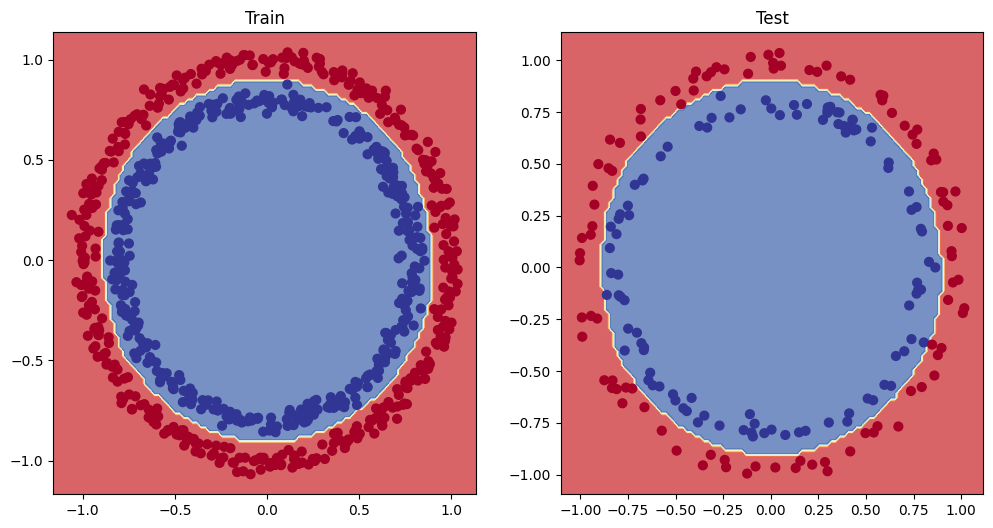

In [21]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

# Multiclass

In [199]:
from sklearn.datasets import make_blobs

n_samples = 1000

X, y = make_blobs(n_samples,
                  n_features = 2,
                  centers = 4,
                  cluster_std = 1.5,
                  random_state = 42)

In [200]:
X.shape, y.shape

((1000, 2), (1000,))

In [201]:
X_blob, y_blob = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.float)

In [202]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = 42)

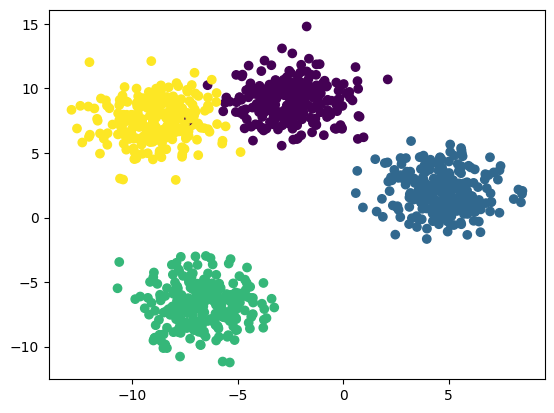

In [203]:
plt.scatter(X_blob[:, 0],
            X_blob[:, 1],
            c = y_blob)
plt.show()

In [204]:
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [205]:
class MultiClassClassificationModel(nn.Module):
  def __init__(self, in_features, out_features, hidden_units):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Linear(in_features, hidden_units),
                                    #  nn.ReLU(),
                                     nn.Linear(hidden_units, hidden_units),
                                    #  nn.ReLU(),
                                     nn.Linear(hidden_units, out_features))

  def forward(self, x):
    return self.layer_stack(x)

In [206]:
model = MultiClassClassificationModel(in_features = 2,
                                      out_features = 4,
                                      hidden_units = 8)
model

MultiClassClassificationModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [207]:
with torch.inference_mode():
  untrained_blob_preds = model(X_blob_test)

untrained_blob_preds[:5], y_test[:5]

(tensor([[ 0.3249, -0.6702,  0.5534,  0.7034],
         [-2.2272,  1.1357, -4.3067, -2.7681],
         [-0.0960,  1.0207,  0.0447, -0.4763],
         [ 0.5597, -0.4984,  1.0717,  0.8755],
         [-1.2347, -0.0276, -2.5135, -1.2171]]),
 tensor([1., 0., 1., 0., 1.]))

In [208]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                             lr = 0.1)

In [209]:
model.eval()
with torch.inference_mode():
  y_logits = model(X_blob_test.to(device))

y_logits[:10]

tensor([[ 0.3249, -0.6702,  0.5534,  0.7034],
        [-2.2272,  1.1357, -4.3067, -2.7681],
        [-0.0960,  1.0207,  0.0447, -0.4763],
        [ 0.5597, -0.4984,  1.0717,  0.8755],
        [-1.2347, -0.0276, -2.5135, -1.2171],
        [-2.6628,  1.3807, -5.1494, -3.3330],
        [ 0.3256,  0.7604,  0.8556,  0.0806],
        [-1.4566,  0.2759, -2.9051, -1.5827],
        [-0.6601,  1.4411, -1.0252, -1.2529],
        [-1.3486,  0.1624, -2.7074, -1.4198]])

In [210]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [211]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.3249, -0.6702,  0.5534,  0.7034],
        [-2.2272,  1.1357, -4.3067, -2.7681],
        [-0.0960,  1.0207,  0.0447, -0.4763],
        [ 0.5597, -0.4984,  1.0717,  0.8755],
        [-1.2347, -0.0276, -2.5135, -1.2171]])
tensor([[0.2447, 0.0905, 0.3075, 0.3573],
        [0.0327, 0.9442, 0.0041, 0.0190],
        [0.1698, 0.5187, 0.1954, 0.1161],
        [0.2279, 0.0791, 0.3803, 0.3126],
        [0.1773, 0.5929, 0.0494, 0.1805]])


In [212]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
        1, 1, 2, 1, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 2, 1, 3])

In [213]:
y_blob_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])

In [214]:
epochs = 100

for epoch in range(epochs):
  model.train()

  y_logits = model(X_blob_train)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_preds)

  loss = loss_fn(y_logits, y_blob_train.long())

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test.long())
    test_acc = accuracy_fn(y_true = y_blob_test,
                    y_pred = test_preds)

  if epoch % 10 == 0:
    print(f'epochs: {epoch} | loss: {loss} | acc: {acc} | test_loss: {test_loss} | test_acc: {test_acc}')

epochs: 0 | loss: 2.8277645111083984 | acc: 1.125 | test_loss: 0.9455254077911377 | test_acc: 62.0
epochs: 10 | loss: 0.17047998309135437 | acc: 99.125 | test_loss: 0.1556292474269867 | test_acc: 99.0
epochs: 20 | loss: 0.08971799165010452 | acc: 99.0 | test_loss: 0.08182767778635025 | test_acc: 99.5
epochs: 30 | loss: 0.06394565105438232 | acc: 99.125 | test_loss: 0.05658077821135521 | test_acc: 99.5
epochs: 40 | loss: 0.051858458667993546 | acc: 99.125 | test_loss: 0.04431730881333351 | test_acc: 99.5
epochs: 50 | loss: 0.04499583691358566 | acc: 99.125 | test_loss: 0.03719616308808327 | test_acc: 99.5
epochs: 60 | loss: 0.0406288281083107 | acc: 99.125 | test_loss: 0.032582543790340424 | test_acc: 99.5
epochs: 70 | loss: 0.0376322939991951 | acc: 99.125 | test_loss: 0.029364706948399544 | test_acc: 99.5
epochs: 80 | loss: 0.03546328470110893 | acc: 99.125 | test_loss: 0.02699844166636467 | test_acc: 99.5
epochs: 90 | loss: 0.03382948786020279 | acc: 99.125 | test_loss: 0.02518785186

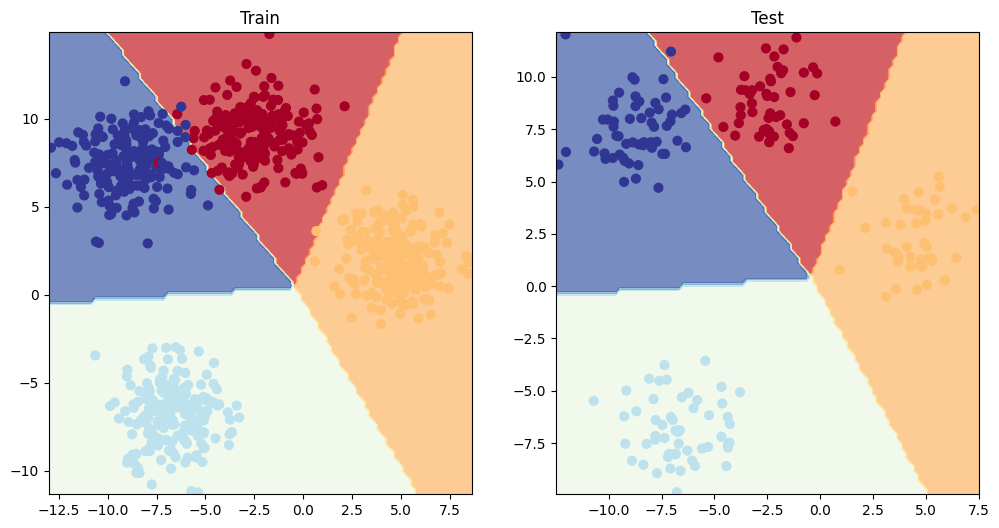

In [215]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_blob_test, y_blob_test)